<a href="https://colab.research.google.com/github/AnnantSharma03/EDA/blob/main/21BDS0330_EDA_THEORY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODULE 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/insurance.csv")
print(df.head(5))
print(df.tail(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,1
children,0
smoker,1
region,1
charges,0


In [ ]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

df['smoker'].fillna(df['smoker'].mode()[0], inplace=True)

df['region'].fillna(df['region'].mode()[0], inplace=True)

df.isnull().sum()

<ipython-input-5-e9a772203f65>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)
<ipython-input-5-e9a772203f65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'].fillna(df['bmi'].mean(), inplace=True)
<ipython-input-5-e9a772203f65>:3: FutureWarning: A value is trying to be set on a copy 

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])

<ipython-input-6-8a6d143d0c49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])


In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,19-35
1,18,male,33.770,1,no,southeast,1725.55230,0-18
2,28,male,33.000,3,no,southeast,4449.46200,19-35
3,33,male,22.705,0,no,northwest,21984.47061,19-35
4,32,male,28.880,0,no,northwest,3866.85520,19-35
5,31,female,25.740,0,no,southeast,3756.62160,19-35
6,46,female,33.440,1,no,southeast,8240.58960,36-50
7,37,female,27.740,3,no,northwest,7281.50560,36-50
8,37,male,29.830,2,no,northeast,6406.41070,36-50
9,60,female,25.840,0,no,northwest,28923.13692,51+


In [ ]:
df1SE =  pd.DataFrame({ 'StudentID': [2,3,4],
                       'ScoreSE' : [23,15,41]})
df2SE =  pd.DataFrame({'StudentID': [6,7,10],
                       'ScoreSE': [27,50,31]})

df1ML =  pd.DataFrame({ 'StudentID': [1,4,5],
                       'ScoreML' : [39,41,19]})
df2ML =  pd.DataFrame({'StudentID': [6,7,8,9],
                       'ScoreML': [20,43,31,34]})

dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df2 = pd.concat([dfML, dfSE], axis=1)
df2

,StudentID,ScoreML,StudentID,ScoreSE
0,1,39,2.0,23.0
1,4,41,3.0,15.0
2,5,19,4.0,41.0
3,6,20,6.0,27.0
4,7,43,7.0,50.0
5,8,31,10.0,31.0
6,9,34,NaN,NaN


In [ ]:
df2 = dfSE.merge(dfML, how='inner')
df2

,StudentID,ScoreSE,ScoreML
0,4,41,41
1,6,27,20
2,7,50,43


In [ ]:
df2 = dfSE.merge(dfML, how='left')
df2

,StudentID,ScoreSE,ScoreML
0,2,23,NaN
1,3,15,NaN
2,4,41,41.0
3,6,27,20.0
4,7,50,43.0
5,10,31,NaN


In [ ]:
df2 = dfSE.merge(dfML, how='right')
df2

,StudentID,ScoreSE,ScoreML
0,1,NaN,39
1,4,41.0,41
2,5,NaN,19
3,6,27.0,20
4,7,50.0,43
5,8,NaN,31
6,9,NaN,34


In [ ]:
df.set_index(['age_group', 'region'], inplace=True)
subset = df.loc[('19-35', 'southeast')]
print(subset)

                     age     sex    bmi  children smoker     charges
age_group region                                                    
19-35     southeast   28    male  33.00         3     no   4449.4620
          southeast   31  female  25.74         0     no   3756.6216
          southeast   23    male  34.40         0     no   1826.8430
          southeast   27    male  42.13         0    yes  39611.7577
          southeast   31  female  36.63         2     no   4949.7587
...                  ...     ...    ...       ...    ...         ...
          southeast   35    male  27.61         1     no   4747.0529
          southeast   26    male  27.06         0    yes  17043.3414
          southeast   21    male  23.21         0     no   1515.3449
          southeast   28  female  26.51         2     no   4340.4409
          southeast   24  female  27.72         0     no   2464.6188

[122 rows x 6 columns]


<ipython-input-12-e7820ffdd09d>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  subset = df.loc[('19-35', 'southeast')]


In [ ]:
series1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
series2 = pd.Series([4, 5, 6], index=['d', 'e', 'f'])
concatenated_series = pd.concat([series1, series2], keys=['Series1', 'Series2'])
concatenated_series

Series1  a    1
         b    2
         c    3
Series2  d    4
         e    5
         f    6
dtype: int64

In [ ]:
unstacked_df = concatenated_series.unstack()
unstacked_df

,a,b,c,d,e,f
Series1,1.0,2.0,3.0,NaN,NaN,NaN
Series2,NaN,NaN,NaN,4.0,5.0,6.0


In [ ]:
df['charges_bin'] = pd.cut(df['charges'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
df.head()

age     sex     bmi  children smoker      charges  \
age_group region                                                         
19-35     southwest   19  female  27.900         0    yes  16884.92400   
0-18      southeast   18    male  33.770         1     no   1725.55230   
19-35     southeast   28    male  33.000         3     no   4449.46200   
          northwest   33    male  22.705         0     no  21984.47061   
          northwest   32    male  28.880         0     no   3866.85520   

                    charges_bin  
age_group region                 
19-35     southwest      Medium  
0-18      southeast         Low  
19-35     southeast         Low  
          northwest      Medium  
          northwest         Low

In [ ]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['charges'] < (Q1 - 1.5 * IQR)) | (df['charges'] > (Q3 + 1.5 * IQR))]
print(outliers)

                     age     sex     bmi  children smoker      charges  \
age_group region                                                         
19-35     southeast   27    male  42.130         0    yes  39611.75770   
          southwest   30    male  35.300         0    yes  36837.46700   
          northeast   34  female  31.920         1    yes  37701.87680   
          southwest   31    male  36.300         2    yes  38711.00000   
          southwest   22    male  35.600         0    yes  35585.57600   
...                  ...     ...     ...       ...    ...          ...   
36-50     southeast   45    male  30.360         0    yes  62592.87309   
51+       northwest   62    male  30.875         3    yes  46718.16325   
36-50     southwest   43    male  27.800         0    yes  37829.72420   
19-35     southwest   19  female  34.700         2    yes  36397.57600   
36-50     southeast   42  female  40.370         2    yes  43896.37630   

                    charges_bin  
age

MODULE 3

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/insurance.csv")
print(df.head(5))
print(df.tail(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [ ]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
print(df.describe())
pd.isna(df).any()

               age          bmi     children       charges
count  1338.000000  1337.000000  1338.000000   1338.000000
mean     39.207025    30.658657     1.094918  13270.422265
std      14.049960     6.098003     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.675000     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


,0
age,False
sex,False
bmi,True
children,False
smoker,True
region,True
charges,False


In [ ]:
bmi = df['bmi'].loc[df['bmi'] != '?']
print(bmi)
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['bmi'] = df['bmi'].astype(int)
print(df['bmi'].head())

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64
0    27
1    33
2    33
3    22
4    28
Name: bmi, dtype: int64


In [ ]:
smoker = df['smoker'].loc[df['smoker'] != '?']
print(smoker)
df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0])

region = df['region'].loc[df['region'] != '?']
print(region)
df['region'] = df['region'].fillna(df['region'].mode()[0])

print(df[['smoker', 'region']].head())

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object
0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object
  smoker     region
0    yes  southwest
1     no  southeast
2     no  southeast
3     no  northwest
4     no  northwest


In [ ]:
mean = df["charges"].mean()
median =df["charges"].median()
mode = df["charges"].mode()
print(mean , median, mode)

13270.422265141257 9382.033 0    1639.5631
Name: charges, dtype: float64


In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])

Text(0.5, 0, 'Age Group')

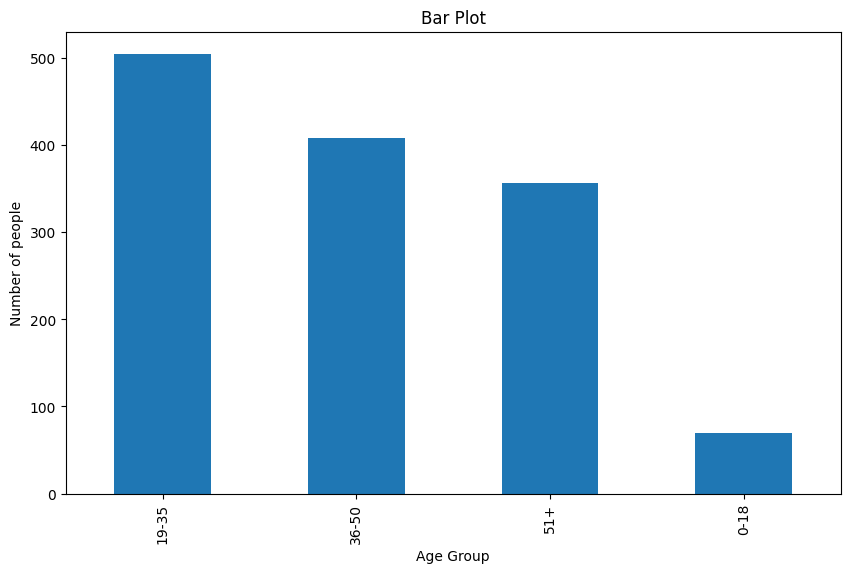

In [ ]:
df.age_group.value_counts().nlargest(30).plot(kind='bar', figsize=(10,6))
plt.title("Bar Plot")
plt.ylabel('Number of people')
plt.xlabel('Age Group')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


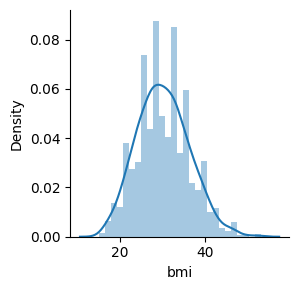

In [ ]:
sns.FacetGrid(df).map(sns.distplot,"bmi").add_legend()

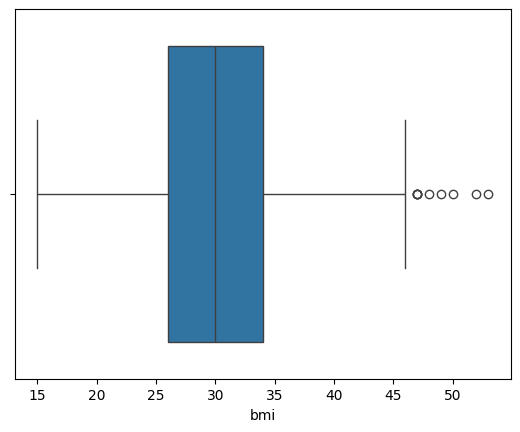

In [ ]:
sns.boxplot(x="bmi",data=df)
plt.show()

Text(0, 0.5, 'charges')

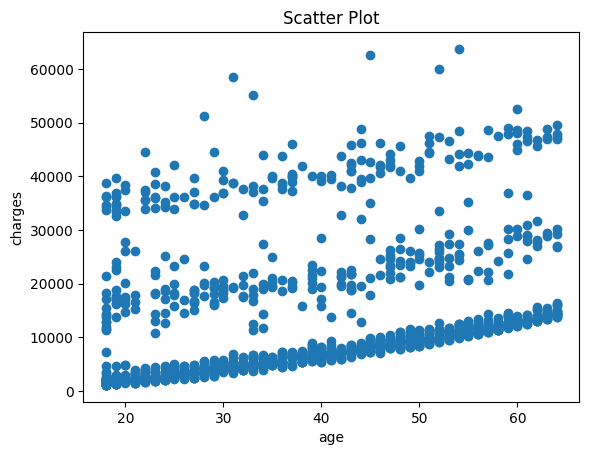

In [ ]:
plt.scatter(df["age"], df["charges"])
plt.title("Scatter Plot")
plt.xlabel("age")
plt.ylabel("charges")

In [ ]:
np.corrcoef(df["age"], df["charges"])

array([[1.        , 0.29900819],
       [0.29900819, 1.        ]])

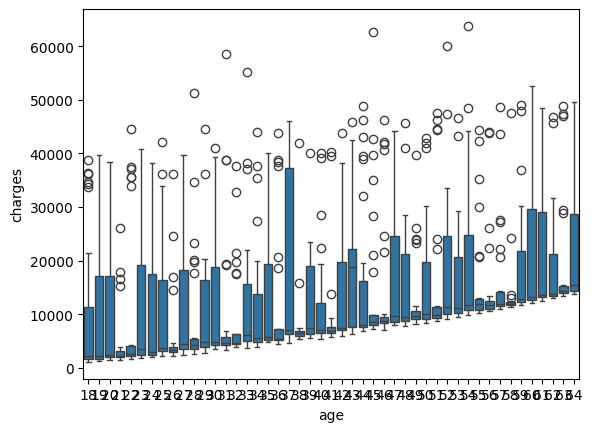

In [ ]:
sns.boxplot(x="age",y="charges",data=df)
plt.show()

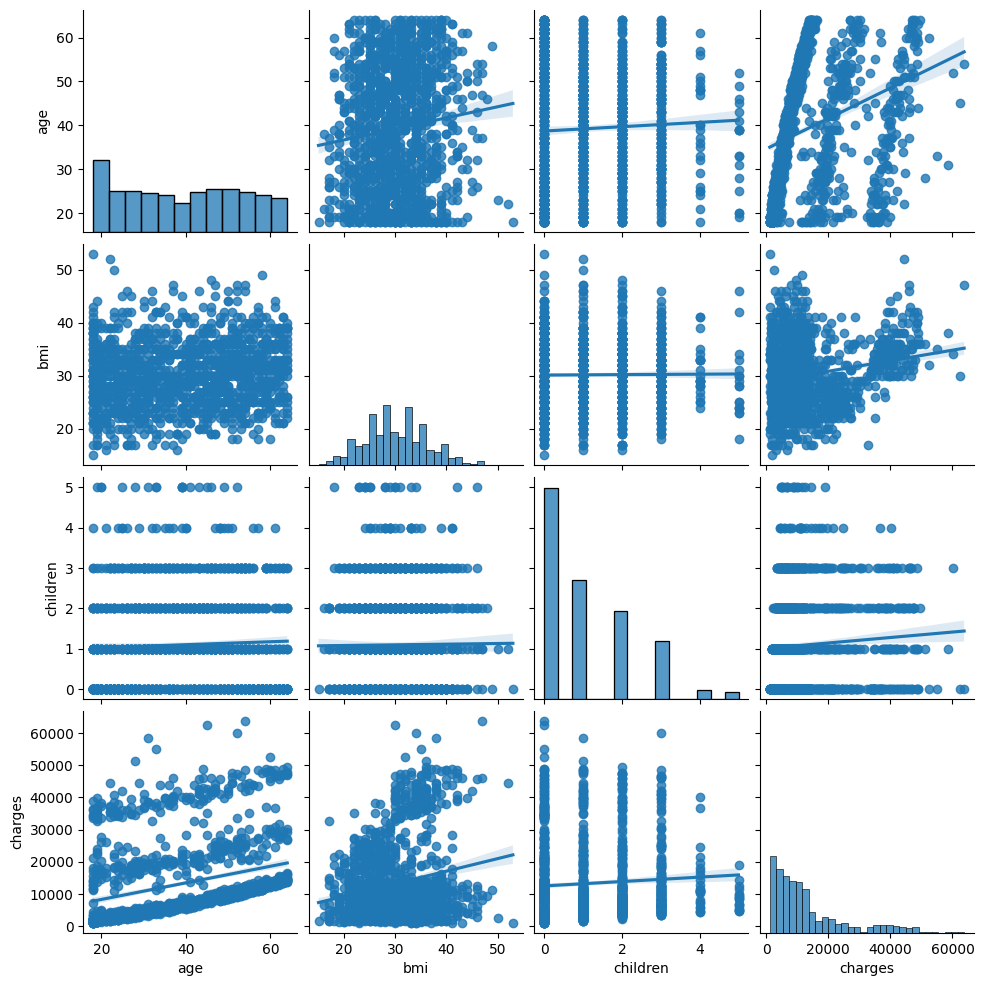

In [ ]:
sns.pairplot(df,vars = [ 'age','bmi','children','charges'], kind="reg")
plt.show()

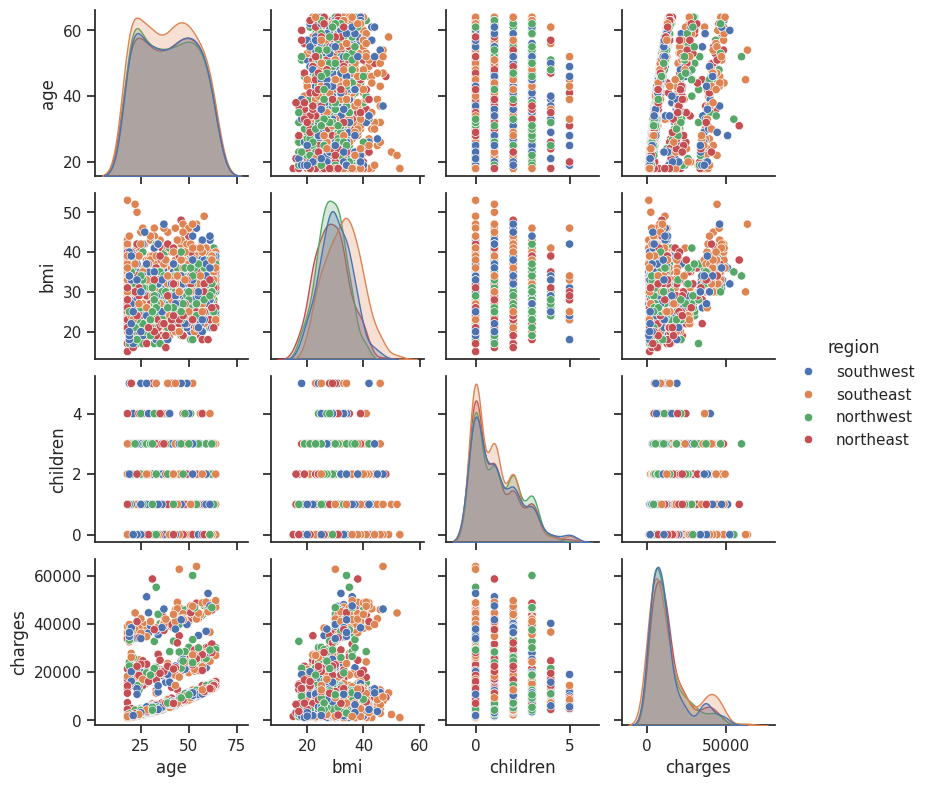

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = [ 'age','bmi','children','charges'], hue="region")
plt.show()

In [ ]:
from scipy import stats

corr = stats.pearsonr(df["age"], df['charges'])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 4.886693331718529e-29
cor:		 0.2990081933306476


In [ ]:
correlation = df.corr(method='pearson', numeric_only=True)
correlation

,age,bmi,children,charges
age,1.000000,0.109658,0.042469,0.299008
bmi,0.109658,1.000000,0.008329,0.196876
children,0.042469,0.008329,1.000000,0.067998
charges,0.299008,0.196876,0.067998,1.000000


<Axes: >

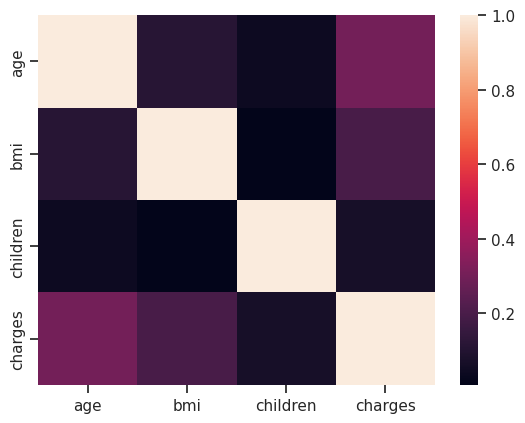

In [ ]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

Skewness

In [ ]:
from scipy.stats import skew

skewness_values = df[['age', 'bmi', 'charges']].apply(skew)
print("Skewness values:\n", skewness_values)

Skewness values:
 age        0.055610
bmi        0.283729
charges    1.514180
dtype: float64


Kurtosis

In [ ]:
from scipy.stats import kurtosis

kurtosis_values = df[['age', 'bmi', 'charges']].apply(kurtosis)
print("Kurtosis values:\n", kurtosis_values)

Kurtosis values:
 age       -1.244921
bmi       -0.052756
charges    1.595821
dtype: float64


Clustering

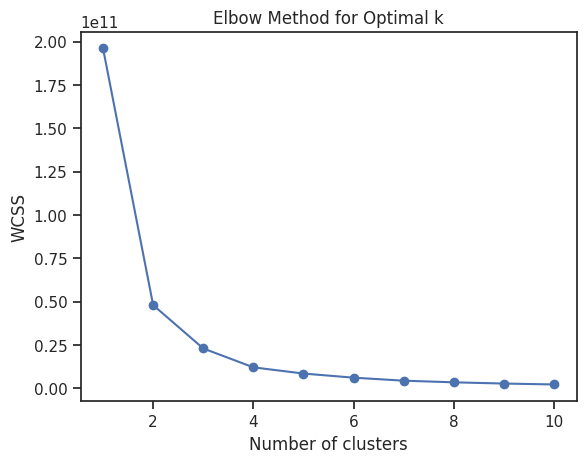

   age  bmi      charges  Cluster
0   19   27  16884.92400        1
1   18   33   1725.55230        0
2   28   33   4449.46200        0
3   33   22  21984.47061        1
4   32   28   3866.85520        0


In [ ]:
from sklearn.cluster import KMeans

X = df[['age', 'bmi', 'charges']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)
print(df[['age', 'bmi', 'charges', 'Cluster']].head())

PCA

       PCA1      PCA2
0 -0.904199  0.254625
1 -1.304667  1.300096
2 -0.733759  0.904218
3 -0.418419 -1.007796
4 -0.978413  0.072272


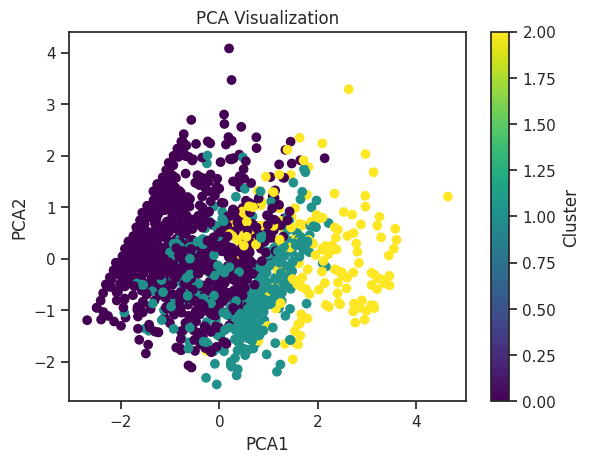

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['age', 'bmi', 'charges']])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

print(df[['PCA1', 'PCA2']].head())

plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Visualization')
plt.colorbar(label='Cluster')
plt.show()

Simple Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['age', 'bmi']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 131707719.6286148
R-Squared Score: 0.1516341656189707
Coefficients: [223.74353933 328.68132856]
Intercept: -5340.807669067455


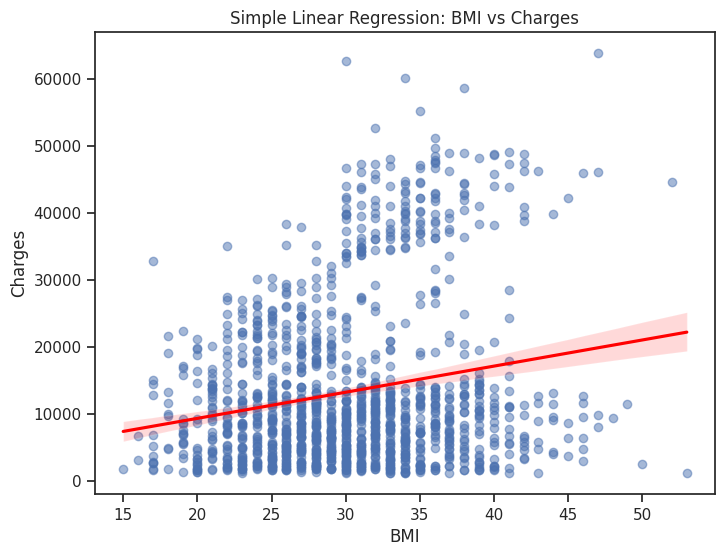

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x=df['bmi'], y=df['charges'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Simple Linear Regression: BMI vs Charges')
plt.show()